> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [15]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
!pip install pandas==1.0.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [17]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
#here we can see all the columns available in the dataset
#From here we can determine possible issues with the data and columns which 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [19]:
# shape of the dataframe
df.shape

(10866, 21)

#### Potential issues with the data
1. Null values
2. Duplicate rows
3. Columns which are not contributing to the analysis

#### Columns to be deleted:
1. **imdb_id**: these IDs are not unique and some rows does not have one. I will use id columns as the primary id
2. **budget**: will be using buget_adj instead to normalize the data for inflation
3. **revenue**: will be using revenue_adj instead to normalize the data for inflation
4. **cast**: from this database alone, no other info is provided for the cast other than their name, additional data such as gender, age, number of appearance in movies/tv shows, net worth, whether they have won Oscar can be useful for this analysis. But sadly those are not included here.
5. **tagline**: does not contribute much to the analysis. Most of then are unique other than a few that are duplicates among films
6. **homepage**: does not contribute much to the analysis.
7. **keywords**: a mixed bag
8. **overview**: not doing any text anaylsis or text mining just yet.
9. **production_companies**: around 10% of the rows does not have the data for production company, will remove it for now for this analysis


### Data Cleaning 

In [20]:
# After discussing the structure of the data and any problems that need to be
# Cleaned, perform those cleaning steps in the second part of this section.

# 1. Removing unwanted rows:
df.drop(columns=['imdb_id','budget','revenue','cast','tagline','homepage','keywords','overview','production_companies'],inplace=True)

In [21]:
# 2. Removing rows with NULL values:
# only two columns with having string values have null values (director and genres)
df.dropna(axis=0,how='any',inplace=True)

In [22]:
# 3. Splitting the genres column and explode the list into multiple rows
df['genres']=df['genres'].str.split("|") 
df2=df.explode('genres')

In [23]:
df2['genres'].value_counts()

Drama              4755
Comedy             3782
Thriller           2905
Action             2379
Romance            1708
Horror             1636
Adventure          1466
Crime              1354
Science Fiction    1224
Family             1223
Fantasy             912
Mystery             809
Animation           692
Documentary         509
Music               402
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
Name: genres, dtype: int64

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26869 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26869 non-null  int64  
 1   popularity      26869 non-null  float64
 2   original_title  26869 non-null  object 
 3   director        26869 non-null  object 
 4   runtime         26869 non-null  int64  
 5   genres          26869 non-null  object 
 6   release_date    26869 non-null  object 
 7   vote_count      26869 non-null  int64  
 8   vote_average    26869 non-null  float64
 9   release_year    26869 non-null  int64  
 10  budget_adj      26869 non-null  float64
 11  revenue_adj     26869 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 2.7+ MB


In [25]:
df2

,id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
10863,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,Beregis Avtomobilya,Eldar Ryazanov,94,Comedy,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,"What's Up, Tiger Lily?",Woody Allen,80,Action,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,"What's Up, Tiger Lily?",Woody Allen,80,Comedy,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


## Exploratory Data Analysis

### 1-D exploration on the data

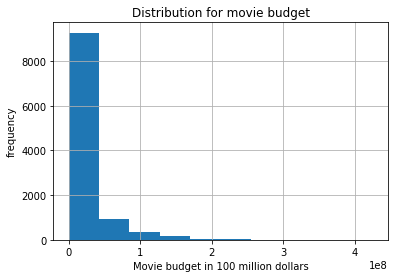

In [39]:
# distribution for movie budget
df['budget_adj'].hist();
plt.xlabel('Movie budget in 100 million dollars')
plt.ylabel('frequency')
plt.title('Distribution for movie budget');

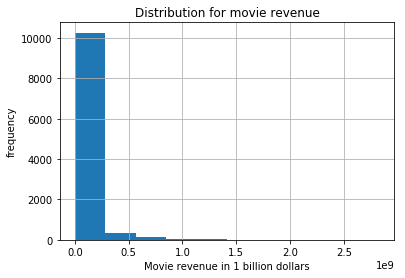

In [40]:
# distribution for movie revenue
df['revenue_adj'].hist();
plt.xlabel('Movie revenue in 1 billion dollars')
plt.ylabel('frequency')
plt.title('Distribution for movie revenue');

Both the movie averaged movie budget and the averaged movie revenue are positively scewed.

### Research Question 1: Which genres are most popular from year to year? 

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df2['genres'].nunique()

20

Text(0.5,1,'Annual counts of movies per genre from year 1966-2015')

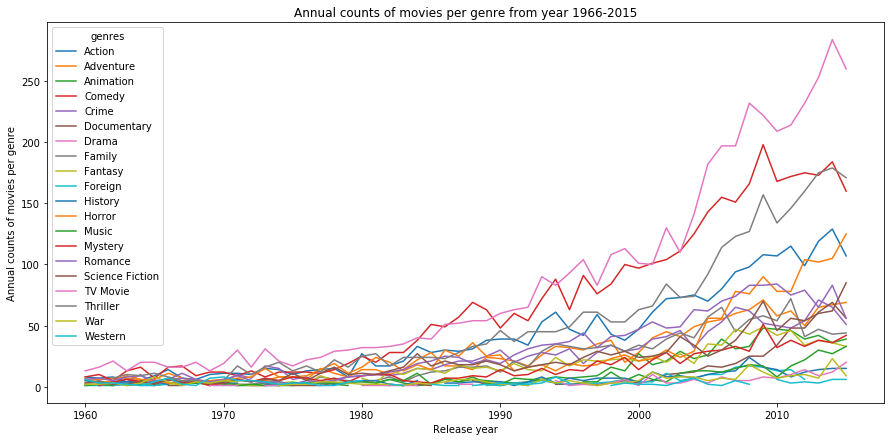

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
df2.groupby(['release_year','genres']).count()['id'].unstack().plot(ax=ax)
ax.set_xlabel('Release year')
ax.set_ylabel('Annual counts of movies per genre')
ax.set_title('Annual counts of movies per genre from year 1966-2015')

In [14]:
genre_counts=df2.groupby(['release_year','genres']).count()['id']
genre_counts.groupby('genres').sum().sort_values(ascending=False)

genres
Drama              4755
Comedy             3782
Thriller           2905
Action             2379
Romance            1708
Horror             1636
Adventure          1466
Crime              1354
Science Fiction    1224
Family             1223
Fantasy             912
Mystery             809
Animation           692
Documentary         509
Music               402
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
Name: id, dtype: int64

Movies in this database is categorized into 20 genres. Among these 20 genres, the top 5 genres that have garnered popularity among the years based on the number of movies being released is Drama, Comedy, Thriller, Action and Romance.

From the line graph we can also see that the total number of films being produced increased exponentially each year.

### Research Question 2: Does higher budget contributes to higher popularity?

In [15]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10801 non-null  int64  
 1   popularity      10801 non-null  float64
 2   original_title  10801 non-null  object 
 3   director        10801 non-null  object 
 4   runtime         10801 non-null  int64  
 5   genres          10801 non-null  object 
 6   release_date    10801 non-null  object 
 7   vote_count      10801 non-null  int64  
 8   vote_average    10801 non-null  float64
 9   release_year    10801 non-null  int64  
 10  budget_adj      10801 non-null  float64
 11  revenue_adj     10801 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.1+ MB


In [44]:
# create a new column for net profit
df['net_profit']=df['revenue_adj']-df['budget_adj']

In [45]:
# import sklearn to perform linear regression to compute the best fit line
from sklearn.linear_model import LinearRegression

In [46]:

x = df['popularity'].values.reshape(-1, 1)  # values converts it into a numpy array (-1 means that calculate the dimension of rows, but have 1 column)
y = df['net_profit'].values.reshape(-1, 1) 
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions

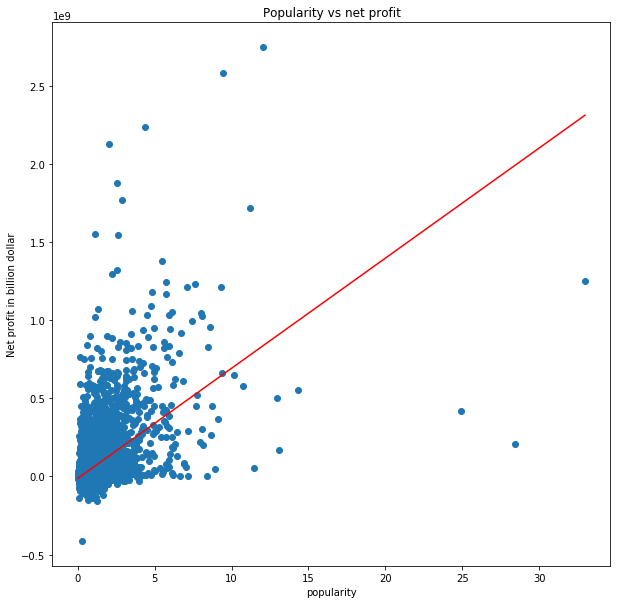

In [47]:
# plotting popularity vs net profit to see the correlation
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
ax.set_xlabel('popularity')
ax.set_ylabel('Net profit in billion dollar')
ax.set_title('Popularity vs net profit');

In [49]:
# calculating pearson coefficient:
df['popularity'].corr(df['net_profit'])


0.5625909054832473

By plotting a scatter plot for popularity against net profit for each movies, there seems to be a positive correlation between this two indicated by the best fit line for the two variables.

However when calculating the pearson correlation coefficient for these two variables, the result is only 0.56. This indicates that there is some positive correlation but not a strong one. Probably have over forced the regression line to fit.

<a id='conclusions'></a>
## Conclusions


The top 5 genres that have garnered popularity among the years based on the number of movies being released is Drama, Comedy, Thriller, Action and Romance.

And there is a positive correlation between popularity and the net-profit of the movies indicated by the regression line and the pearson correlation coefficient. But the correlation is not strong

The limitation for this data set is that the data is not current. Now it is year 2020 but the dataset is only till 2015.
Removed quit a few of the rows because it does not have either the director or genres column filled.
This might affect the results of my analysis on genres.


## Submitting your Project 


In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0